# Clustering

See our notes on [unsupervised learning](https://jennselby.github.io/MachineLearningCourseNotes/#unsupervised-learning), [K-means](https://jennselby.github.io/MachineLearningCourseNotes/#k-means-clustering), [DBSCAN](https://jennselby.github.io/MachineLearningCourseNotes/#dbscan-clustering), and [clustering validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation).

For documentation of various clustering methods in scikit-learn, see http://scikit-learn.org/stable/modules/clustering.html

The code was based on the example at http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
which has the following comments:

Code source: Gaël Varoquaux<br/>
Modified for documentation by Jaques Grobler<br/>
License: BSD 3 clause

In [5]:
%matplotlib inline
import numpy
import matplotlib.pyplot

from mpl_toolkits.mplot3d import Axes3D #3d plot

from sklearn.cluster import KMeans #k-means clustering
from sklearn import datasets #sklearn generated datasets

import pandas as pd

## Iris Dataset

Before you go on, if you haven't used the iris dataset in a previous assignment, make sure you understand it. Modify the cell below to examine different parts of the dataset that are contained in the iris dictionary object.

What are the features? What are we trying to classify?

In [6]:
iris = datasets.load_iris()
wine = datasets.load_wine()
iris.keys()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

wine_df = pd.DataFrame(wine.data)
wine_df.columns = wine.feature_names
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualization Setup

In [9]:
#each feature of wine represents an axis in cartesian coordinates
#I will plot alcohol, color, and magnesium

X_FEATURE = 'alcohol' 
Y_FEATURE = 'color_intensity' 
Z_FEATURE = 'magnesium'

NUM_COLS = 4
NUM_ROWS = 6
FIG_WIDTH = 4 * NUM_COLS
FIG_HEIGHT = 3 * NUM_ROWS

def add_plot(figure, subplot_num, subplot_name, data, labels):

    axis = figure.add_subplot(NUM_ROWS, NUM_COLS, subplot_num, projection='3d',
                              elev=48, azim=134)

    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    axis.title.set_text(subplot_name)

## Visualization

This is the correct labeling, based on the targets.

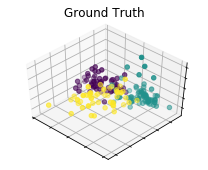

In [10]:
truth_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(truth_figure, 1, "Ground Truth", wine_df, wine.target)

## Training and Visualization

Now let's see how k-means clusters the iris dataset, with various different numbers of clusters

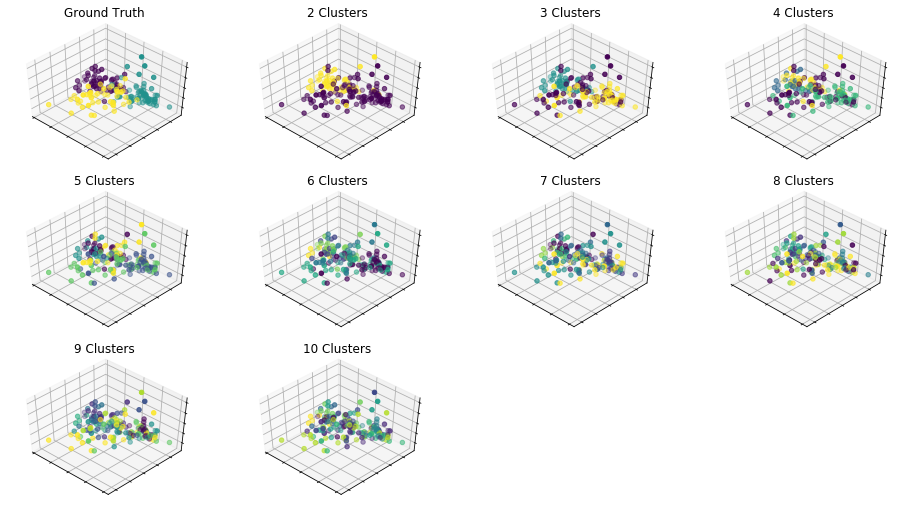

In [11]:
MAX_CLUSTERS = 10
# start a new figure to hold all of the subplots
kmeans_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(kmeans_figure, 1, "Ground Truth", wine_df, wine.target)

plot_num = 2
for num_clusters in range(2, MAX_CLUSTERS + 1):
    
    model = KMeans(n_clusters=num_clusters)
    model.fit(wine_df)

    labels = model.labels_
    
    title = '{} Clusters'.format(num_clusters) 
    add_plot(kmeans_figure, plot_num, title, wine_df, labels.astype(numpy.float))
    plot_num += 1

# Exercise

1. Add [validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation) to measure how good the clustering is, with different numbers of clusters.
1. Run the iris data through DBSCAN or hierarchical clustering and validate that as well.
1. Comment on the validation results, explaining which models did best and why you think that might be.

In [12]:
#1. I'll use the Adjusted Rand Index to validate the "3 Clusters" in relation to the established ground truth
#Source: https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index

#2. I'll use sklearn DBSCAN to interpret the wine dataset and I'll use the same validation method
#Source: https://scikit-learn.org/stable/modules/clustering.html#dbscan

#3. Comments will be below: 

In [13]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]

In [14]:
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.adjusted_rand_score(labels_true, labels_pred)

#labels are the found values, and the index returns the score of 
#how similar the two lists are. 

#A drawback is that it requires the ground truth, so you can't really
#use adjusted rand if you're trying to cluster something that humans
#can't interpret. But with our data, we already have the ground truth.

0.24242424242424246

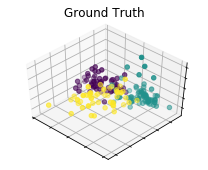

In [17]:
truth_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
add_plot(truth_figure, 1, "Ground Truth", wine_df, wine.target)

In [33]:
#The wine.target is the ground truth array that we need. I need to 
#compare it to the generated data. 

labels_true = wine.target.tolist()

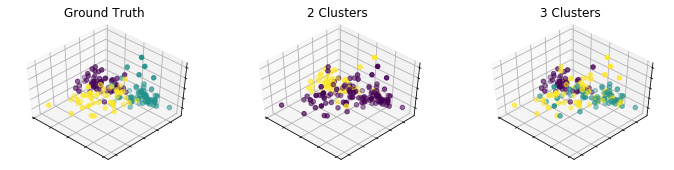

In [31]:
MAX_CLUSTERS = 3

kmeans_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(kmeans_figure, 1, "Ground Truth", wine_df, wine.target)

plot_num = 2
for num_clusters in range(2, MAX_CLUSTERS+1):
    
    model = KMeans(n_clusters=num_clusters)
    model.fit(wine_df)

    labels = model.labels_
    
    title = '{} Clusters'.format(num_clusters) 
    add_plot(kmeans_figure, plot_num, title, wine_df, labels.astype(numpy.float))
    plot_num += 1

In [35]:
#labels for the "3 Clusters plot"
labels_pred = model.labels_

In [43]:
#This will print the adjusted rand score
#The perfect score is 1
metrics.adjusted_rand_score(labels_true, labels_pred)

0.37111371823084754

In [46]:
def validateClusters(data, target, max_clusters):

    kmeans_figure = matplotlib.pyplot.figure(figsize=(16, 18))

    add_plot(kmeans_figure, 1, "Ground Truth", data, target)

    plot_num = 2
    for num_clusters in range(2, MAX_CLUSTERS+1):
    
        model = KMeans(n_clusters=num_clusters)
        model.fit(wine_df)
    
        labels = model.labels_
    
        title = '{} Clusters'.format(num_clusters) 
        add_plot(kmeans_figure, plot_num, title, data, labels.astype(numpy.float))
        plot_num += 1

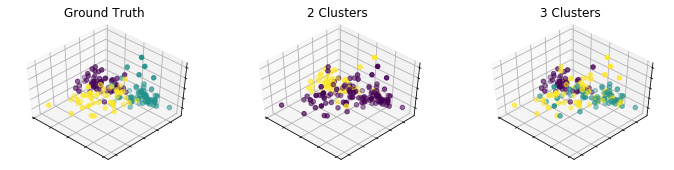

In [47]:
#Okay, so far my method shows the plots correctly. Let's continue. 
validateClusters(wine_df, wine.target, 3)

In [48]:
def validateClusters(data, target, max_clusters):

    kmeans_figure = matplotlib.pyplot.figure(figsize=(16, 18))

    add_plot(kmeans_figure, 1, "Ground Truth", data, target)

    plot_num = 2
    for num_clusters in range(2, MAX_CLUSTERS+1):
    
        model = KMeans(n_clusters=num_clusters)
        model.fit(wine_df)
    
        labels = model.labels_
    
        title = '{} Clusters'.format(num_clusters) 
        add_plot(kmeans_figure, plot_num, title, data, labels.astype(numpy.float))
        plot_num += 1
        
        labels_true = target.tolist()
        labels_pred = model.labels_
        print(metrics.adjusted_rand_score(labels_true, labels_pred))

0.3694075388574537
0.37111371823084754


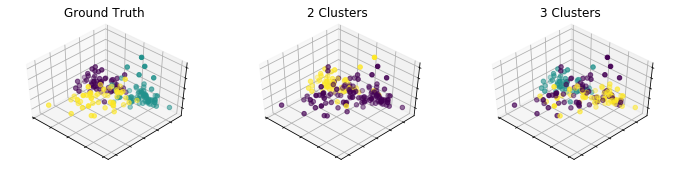

In [49]:
validateClusters(wine_df, wine.target, 3)

In [63]:
#Okay, great, but what do those numbers mean? Let's make it a little
#more clear. 

def validateClusters(data, target, max_clusters):

    kmeans_figure = matplotlib.pyplot.figure(figsize=(16, 18))

    add_plot(kmeans_figure, 1, "Ground Truth", data, target)

    plot_num = 2
    for num_clusters in range(2, MAX_CLUSTERS+1):
    
        model = KMeans(n_clusters=num_clusters)
        model.fit(wine_df)
    
        labels = model.labels_
    
        title = '{} Clusters'.format(num_clusters) 
        add_plot(kmeans_figure, plot_num, title, data, labels.astype(numpy.float))
        plot_num += 1
        
        labels_true = target.tolist()
        labels_pred = model.labels_
        print("Adjusted Rand Index Score:", 
              metrics.adjusted_rand_score(labels_true, labels_pred),
              "for", num_clusters, "Clusters")

Adjusted Rand Index Score: 0.3694075388574537 for 2 Clusters
Adjusted Rand Index Score: 0.37111371823084754 for 3 Clusters


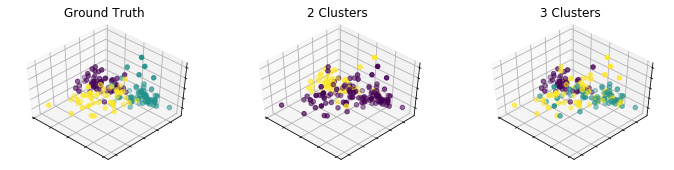

In [64]:
validateClusters(wine_df, wine.target, 3)

In [66]:
#Okay, that's great for now. I imagine it would be a little difficult
#to program the Adjusted Rand Index permuation model myself, mostly
#because I'm not experienced with advanced statistics. However, I 
#would like to learn more advanced statistics in the future. 

#Basically, for the adjusted rand index, the "similarities" between 
#the ground truth and the predicted values are placed into a 
#"Contingency Table" in which values are summed by rows and columns
#with the truth and predicted values are lined along the side and top
#of the table. The results of these summations are used in the 
#permutation model (which involves several sums and permuations), and 
#the whole expression returns the adjusted index value which we can
#use to determine just how close our predicted values are to the ground
#truth. That's my interpretation of Adjusted Rand Index at least. 